In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from transforms.augmentations import *

In [2]:
from models.networks.Attention_unet import AttentionUnet

In [83]:
data_gauss=np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Gaussian_heating_data/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size5mm_depth10pct_thickness3mm/param_fbh_gaussian_size5mm_depth10pct_thickness3mm.npz')
data_uniform=np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Uniform_heating_data/2025.07.06 -param_study_fbh_size_depth_thickness/param_fbh_size20mm_depth90pct_thickness3mm/param_fbh_size20mm_depth90pct_thickness3mm.npz')

<h1>Characteristic of synthetic data</h1>

In [84]:
data_gauss['data'].shape

(304, 512, 512)

In [85]:
data_gauss['mask'].shape

(512, 512)

In [86]:
data_uniform['data'].shape

(124, 512, 512)

Text(0.5, 1.0, 'Uniform Heating example')

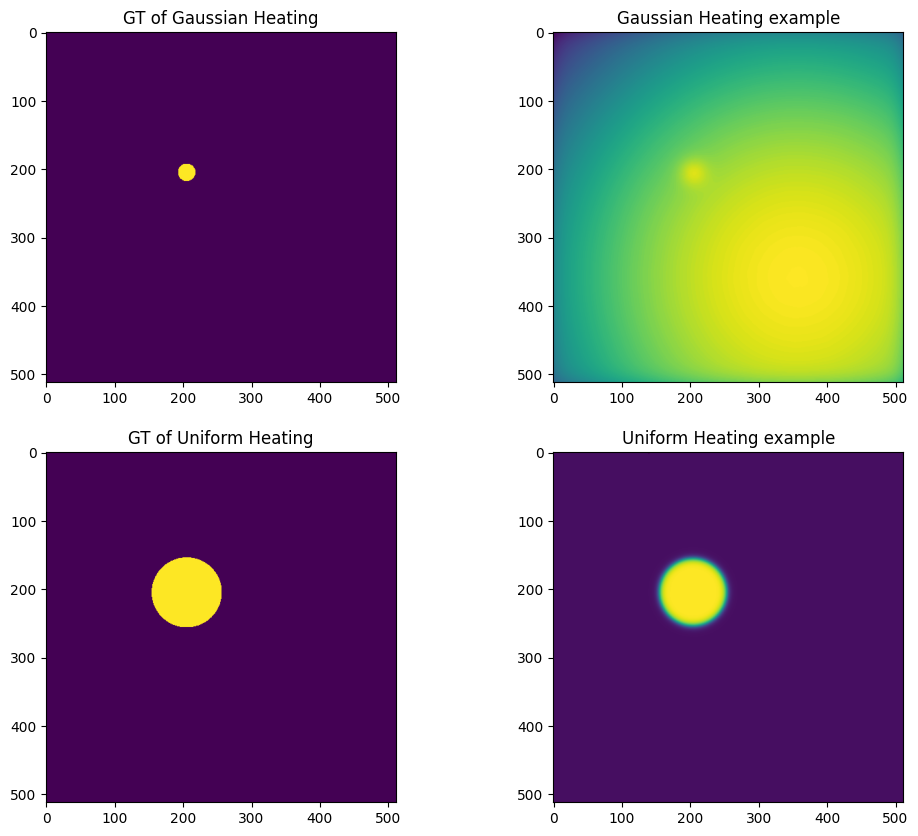

In [87]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(data_gauss['mask'])
plt.title('GT of Gaussian Heating')
plt.subplot(2,2,2)
plt.imshow(data_gauss['data'][100,:,:])
plt.title('Gaussian Heating example')
plt.subplot(2,2,3)
plt.imshow(data_uniform['mask'])
plt.title('GT of Uniform Heating')
plt.subplot(2,2,4)
plt.imshow(data_uniform['data'][20,:,:])
plt.title('Uniform Heating example')


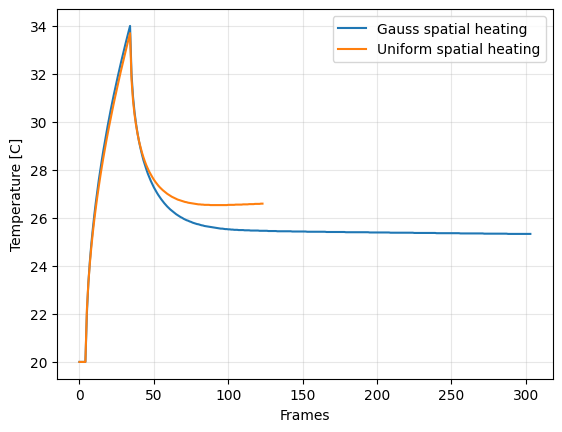

In [88]:
plt.plot(data_gauss['data'][:,250,250],label='Gauss spatial heating')
plt.plot(data_uniform['data'][:,250,250],label='Uniform spatial heating')
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.legend()

<h1>Characteristic of Gaussian heating</h1>

In [89]:
data_gauss_set=[
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Gaussian_heating_data/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size5mm_depth10pct_thickness3mm/param_fbh_gaussian_size5mm_depth10pct_thickness3mm.npz'),
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Gaussian_heating_data/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size10mm_depth50pct_thickness6mm/param_fbh_gaussian_size10mm_depth50pct_thickness6mm.npz'),
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Gaussian_heating_data/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size25mm_depth80pct_thickness5mm/param_fbh_gaussian_size25mm_depth80pct_thickness5mm.npz')
]

Text(0.5, 1.0, 'Batch 3')

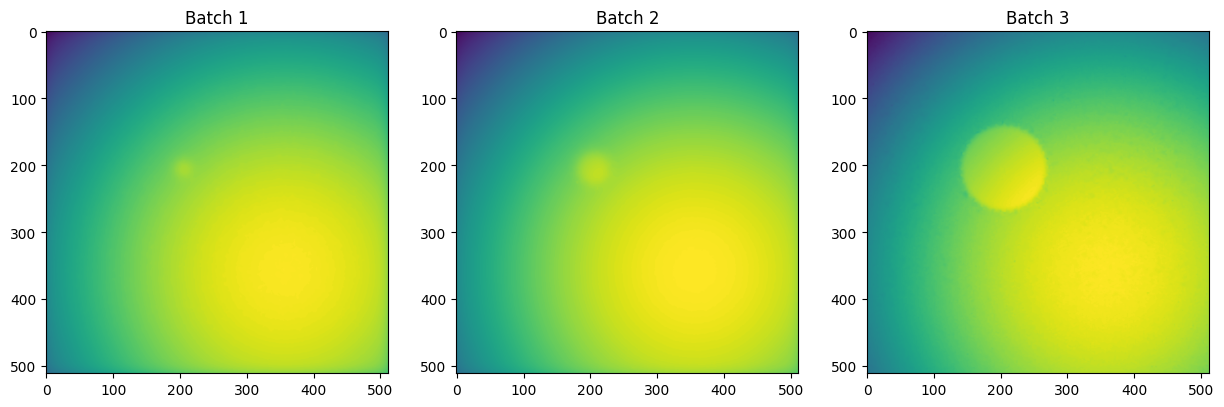

In [90]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(data_gauss_set[0]['data'][50,:,:])
plt.title('Batch 1')
plt.subplot(1,3,2)
plt.imshow(data_gauss_set[1]['data'][50,:,:])
plt.title('Batch 2')
plt.subplot(1,3,3)
plt.imshow(data_gauss_set[2]['data'][10,:,:])
plt.title('Batch 3')

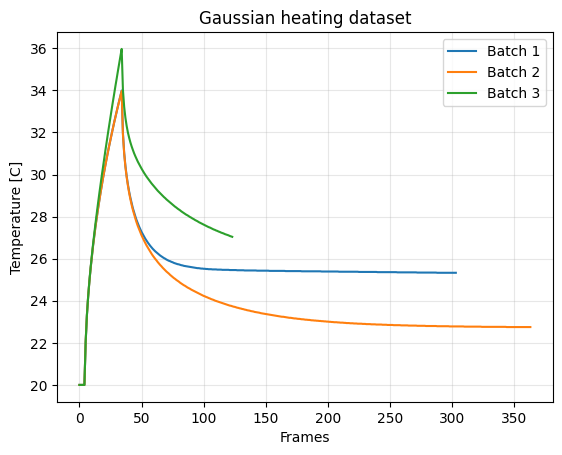

In [91]:
plt.plot(data_gauss_set[0]['data'][:,250,250],label='Batch 1')
plt.plot(data_gauss_set[1]['data'][:,250,250],label='Batch 2')
plt.plot(data_gauss_set[2]['data'][:,250,250],label='Batch 3')
plt.title('Gaussian heating dataset')
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.legend()

<h1>Characteristic of uniform heating</h1>

In [92]:
data_uniform_set=[
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Uniform_heating_data/2025.06.27 - param_study_fbh_size_depth_thickness/param_fbh_size5mm_depth20pct_thickness3mm/param_fbh_size5mm_depth20pct_thickness3mm.npz'),
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Uniform_heating_data/2025.07.03 - param_study_fbh_size_depth_thickness/param_fbh_size15mm_depth60pct_thickness5mm/param_fbh_size15mm_depth60pct_thickness5mm.npz'),
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Uniform_heating_data/2025.07.06 -param_study_fbh_size_depth_thickness/param_fbh_size25mm_depth90pct_thickness3mm/param_fbh_size25mm_depth90pct_thickness3mm.npz')
]

Text(0.5, 1.0, 'Batch 3')

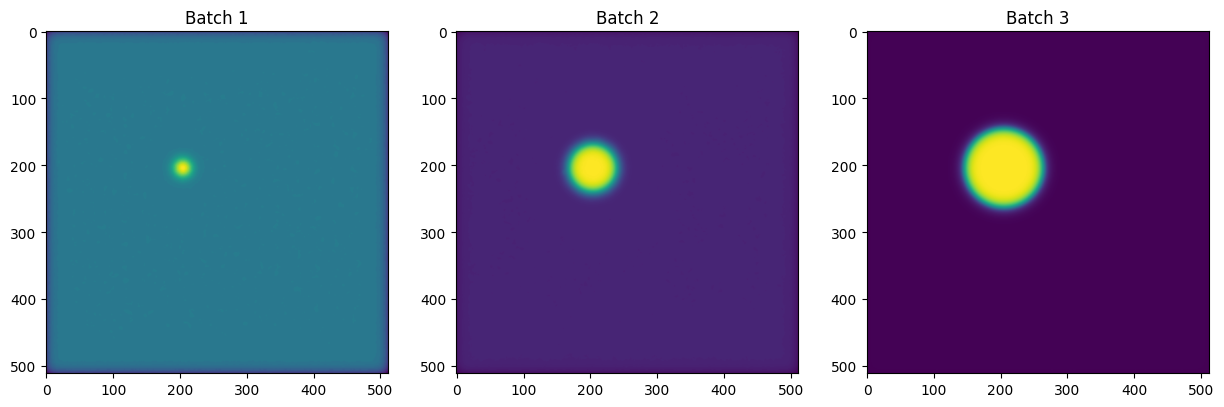

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(data_uniform_set[0]['data'][50,:,:])
plt.title('Batch 1')
plt.subplot(1,3,2)
plt.imshow(data_uniform_set[1]['data'][50,:,:])
plt.title('Batch 2')
plt.subplot(1,3,3)
plt.imshow(data_uniform_set[2]['data'][50,:,:])
plt.title('Batch 3')

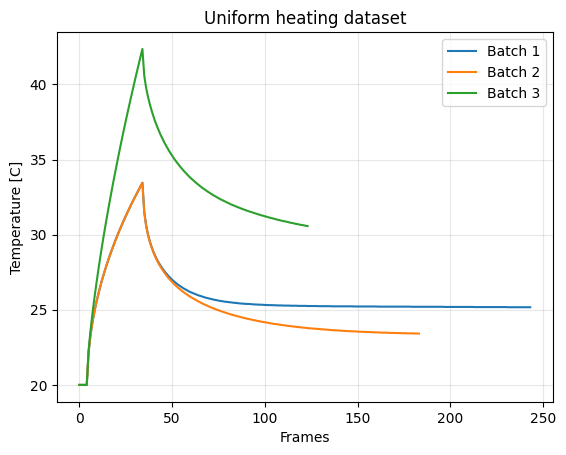

In [94]:
plt.plot(data_uniform_set[0]['data'][:,250,250],label='Batch 1')
plt.plot(data_uniform_set[1]['data'][:,250,250],label='Batch 2')
plt.plot(data_uniform_set[2]['data'][:,250,250],label='Batch 3')
plt.title('Uniform heating dataset')
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.legend()

<h1>Augmentation techniques</h1>

In [8]:
from transforms.augmentations import *

In [96]:
sample=data_gauss['data']
sample.shape

(304, 512, 512)

In [97]:
data_gauss['mask'].shape

(512, 512)

In [98]:
mask=data_gauss['mask']
mask.shape

(512, 512)

In [99]:
sample.dtype

dtype('float64')

In [100]:
sample=torch.from_numpy(sample).to(torch.float64)

In [101]:
sample=sample.unsqueeze(0)

In [102]:
sample.size()

torch.Size([1, 304, 512, 512])

In [103]:
flip=RandomFlip3D(axes=(1,2))

In [104]:
sample_mod,_=flip(sample)

In [105]:
sample_mod.size()

torch.Size([1, 304, 512, 512])

<h2>Random flip of all frames</h2>

Text(0.5, 1.0, 'Frame from modified sample')

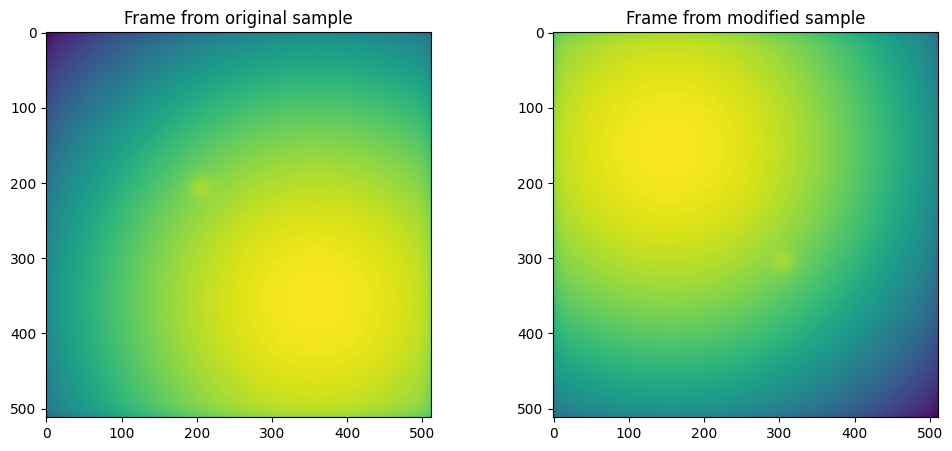

In [106]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_mod[0,50,:,:])
plt.title('Frame from modified sample')

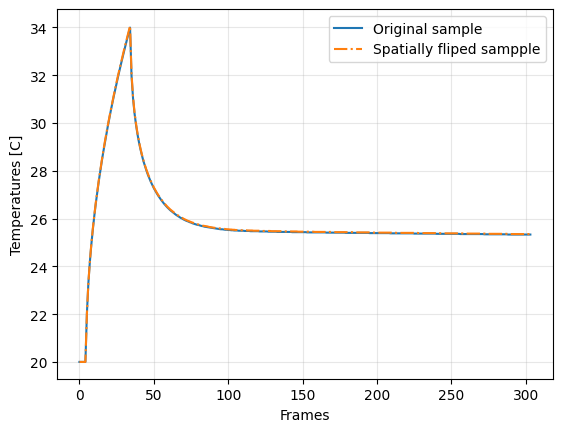

In [107]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_mod[0,:,250,250],label='Spatially fliped sampple',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()


<h2>Add Gaussian Noise to the sequence</h2>

In [108]:
noise=AddGaussianNoise3D(mean=0.5,std=0.065)

In [109]:
sample_noise,_=noise(sample)

Text(0.5, 1.0, 'Frame from modified sample')

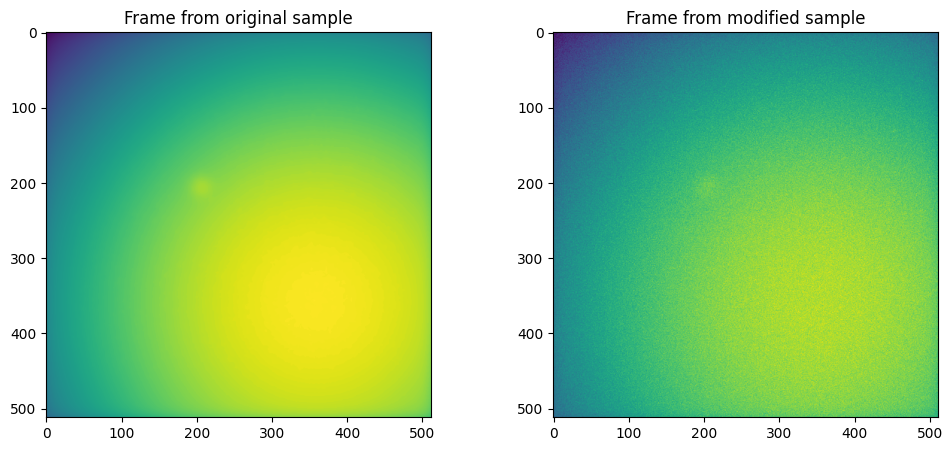

In [110]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_noise[0,50,:,:])
plt.title('Frame from modified sample')

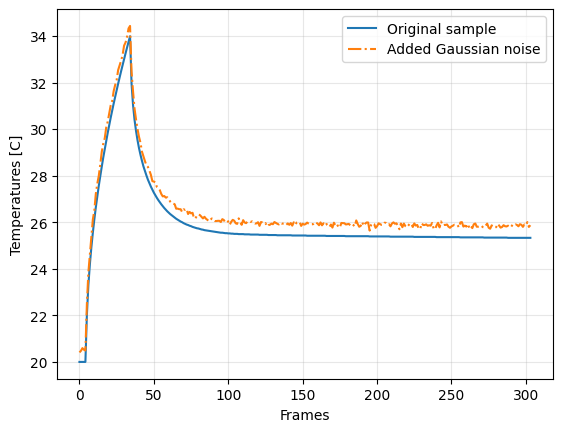

In [111]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_noise[0,:,250,250],label='Added Gaussian noise',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()

(25.0, 27.0)

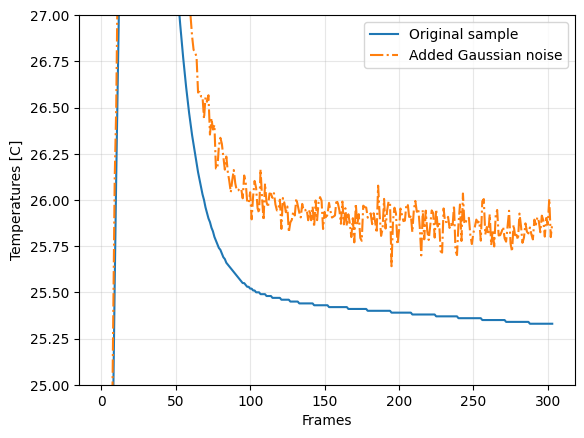

In [112]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_noise[0,:,250,250],label='Added Gaussian noise',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()
plt.ylim([25,27])

<h2>Random rotation</h2>

In [113]:
rotation=RandomSequenceRotation(degrees=160.0,max_shift=(25,25),padding_mode='border')

In [114]:
sample.size()

torch.Size([1, 304, 512, 512])

In [115]:
sample_rot,_=rotation(sample)

Text(0.5, 1.0, 'Frame from modified sample')

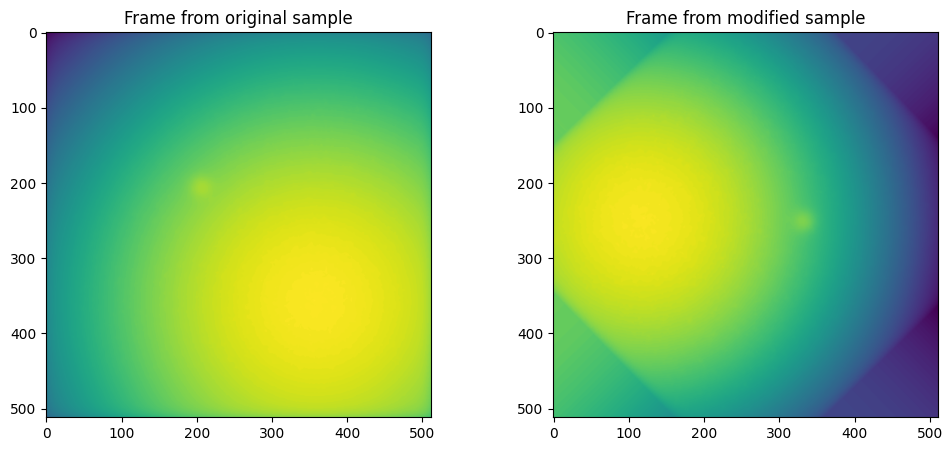

In [116]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_rot[0,50,:,:])
plt.title('Frame from modified sample')

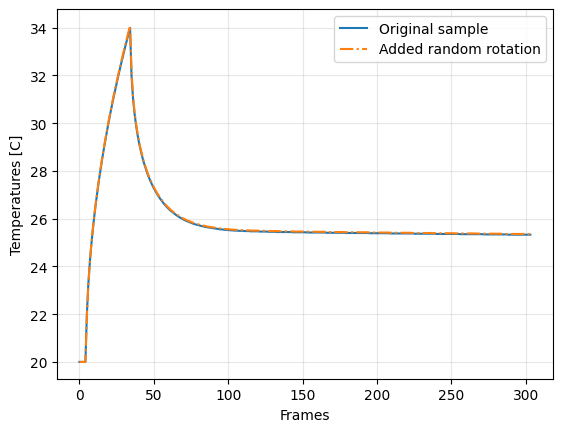

In [117]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_rot[0,:,250,250],label='Added random rotation',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()


<h2>Elastic transformation</h2>

In [118]:
elastic=RandomElasticTransform(alpha=30,sigma=1)

In [119]:
sample_ela,_=elastic(sample)

TypeError: random.Random.uniform() argument after * must be an iterable, not int

Text(0.5, 1.0, 'Frame from modified sample')

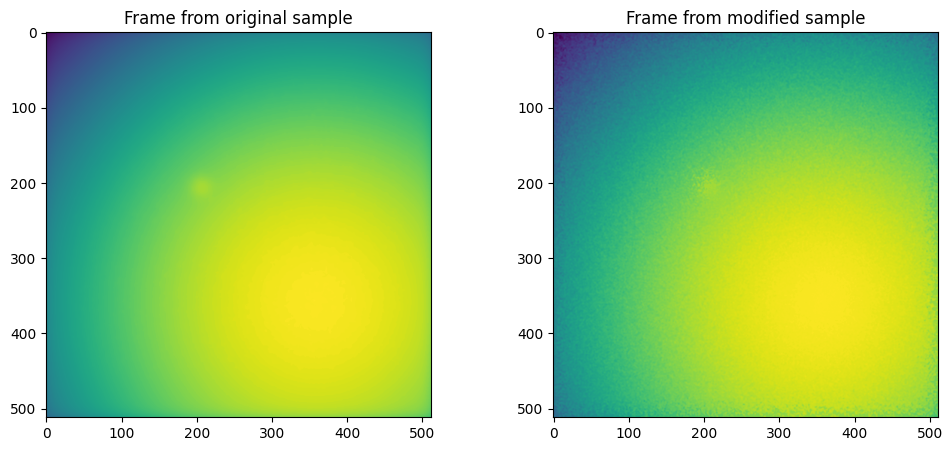

In [ ]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_ela[0,50,:,:])
plt.title('Frame from modified sample')

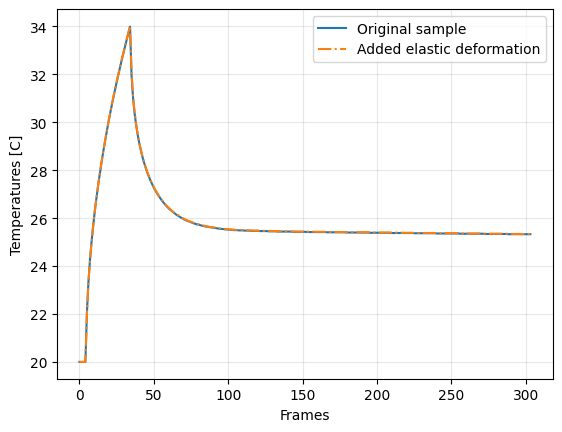

In [ ]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_ela[0,:,250,250],label='Added elastic deformation',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()


<h2>Moving heating point</h2>

In [ ]:
prepend=PrependFirstFrame()

In [ ]:
sample_prep,_=prepend(sample)

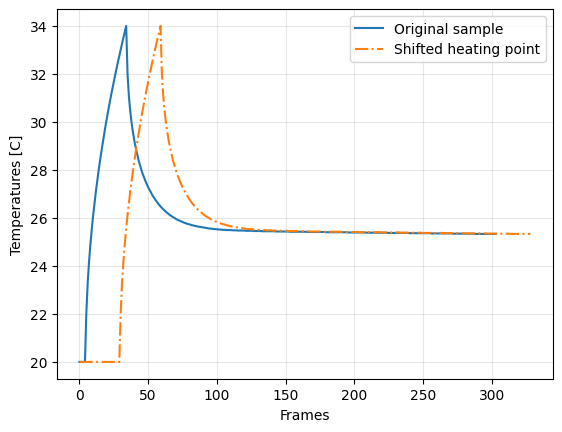

In [ ]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_prep[0,:,250,250],label='Shifted heating point',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()

<h2>Random cropping</h2>

In [ ]:
sample.size()

torch.Size([1, 304, 512, 512])

In [ ]:
crop=RandomCropSequence()

In [ ]:
mask.dtype

dtype('uint8')

In [ ]:
mask=torch.from_numpy(mask).to(torch.uint8)

In [ ]:
mask=mask.unsqueeze(0)

In [ ]:
sample_crop,mask_crop=crop(sample,mask)

Text(0.5, 1.0, 'GT from modified sample')

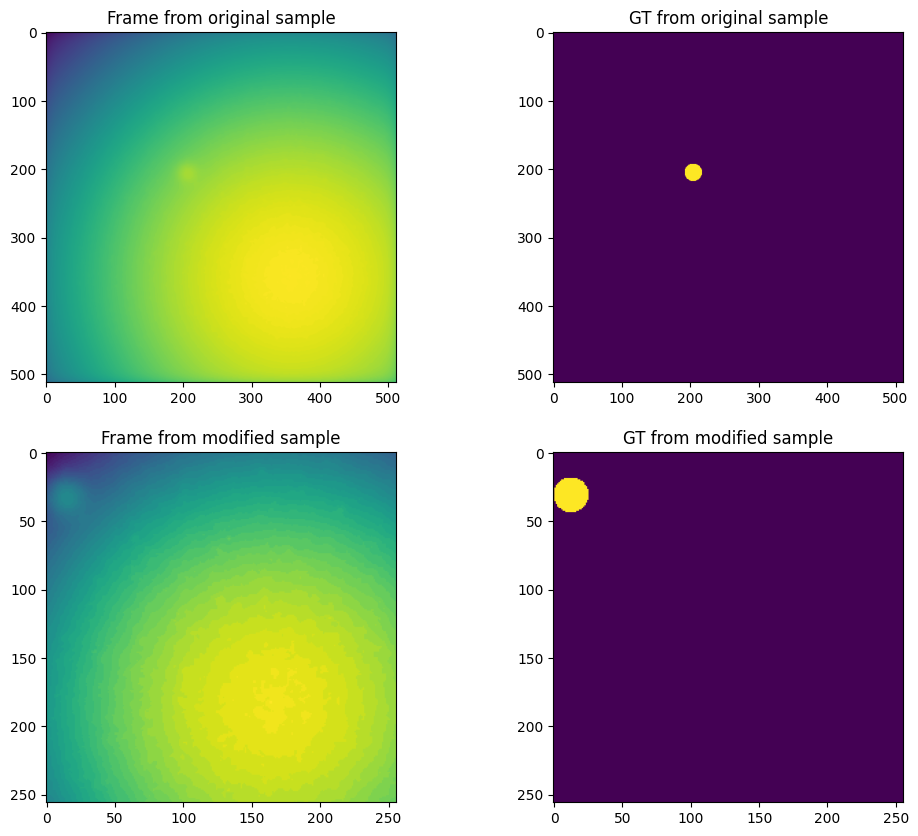

In [ ]:
plt.figure(figsize= (12,10))
plt.subplot(2,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(2,2,2)
plt.imshow(mask[0,:,:])
plt.title('GT from original sample')

plt.subplot(2,2,3)
plt.imshow(sample_crop[0,50,:,:])
plt.title('Frame from modified sample')

plt.subplot(2,2,4)
plt.imshow(mask_crop[0,:,:])
plt.title('GT from modified sample')

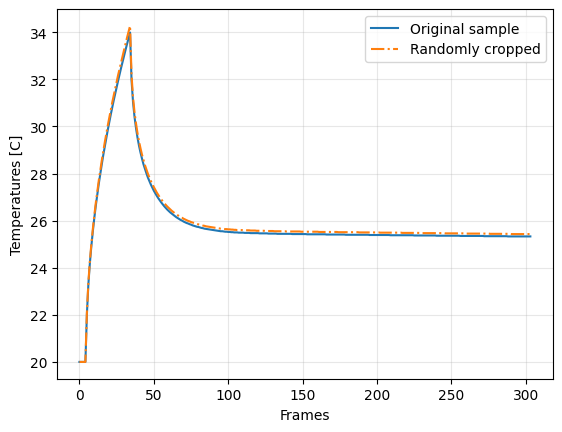

In [ ]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_crop[0,:,130,130],label='Randomly cropped',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()

<h2>Random Brightness and contrast range</h2>

In [ ]:
brightcontrast=RandomBrightnessContrast(brightness_range=(-0.5,0.5),contrast_range=(0.5,1.5))

In [ ]:
sample_bc,_=brightcontrast(sample)

Text(0.5, 1.0, 'Frame from modified sample')

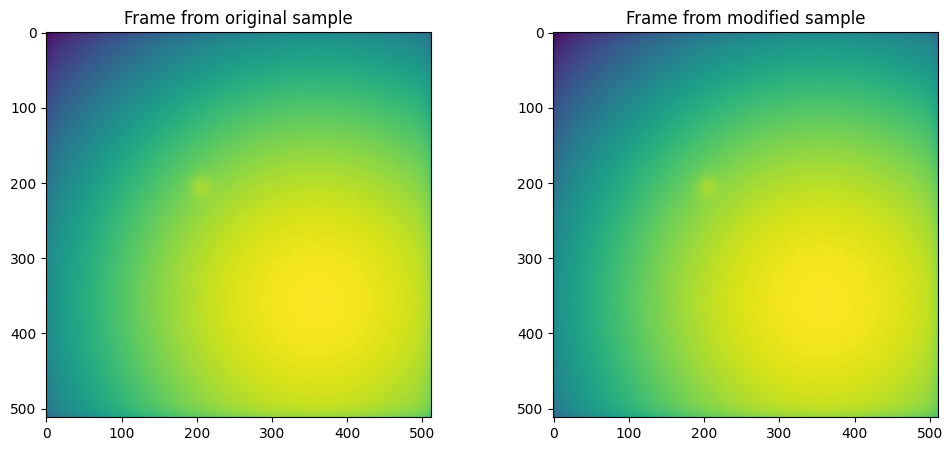

In [ ]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_bc[0,50,:,:])
plt.title('Frame from modified sample')

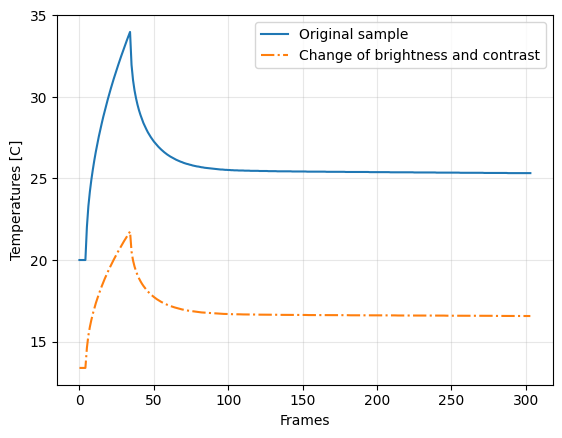

In [ ]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_bc[0,:,130,130],label='Change of brightness and contrast',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()

<h2>Temporal stretching or shrinking of the sequence<h2>

In [ ]:
temporal=RandomPhaseAwareSpeedChange()

In [ ]:
sample_temp,_=temporal(sample)

Text(0.5, 1.0, 'Frame from modified sample')

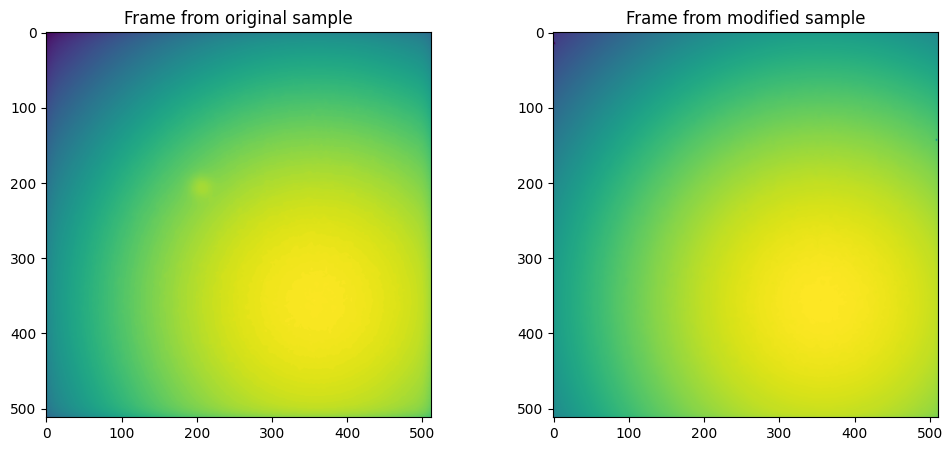

In [ ]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_temp[0,50,:,:])
plt.title('Frame from modified sample')

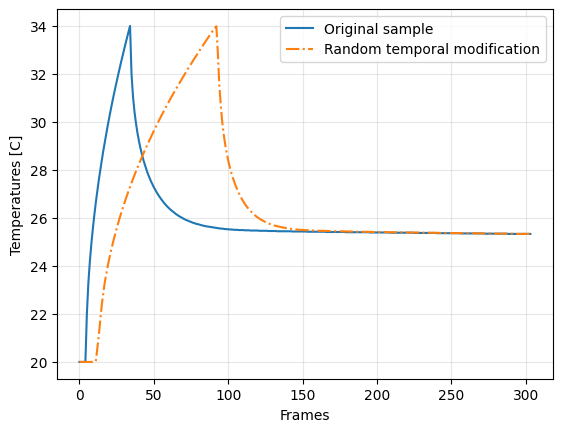

In [ ]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_temp[0,:,250,250],label='Random temporal modification',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()

<h1>Investigation of modification of the mask<h1>

In [ ]:
mask.dtype

torch.uint8

In [ ]:
mask.size()

torch.Size([1, 512, 512])

In [ ]:
sample.dtype

torch.float64

In [ ]:
sample.size()

torch.Size([1, 304, 512, 512])

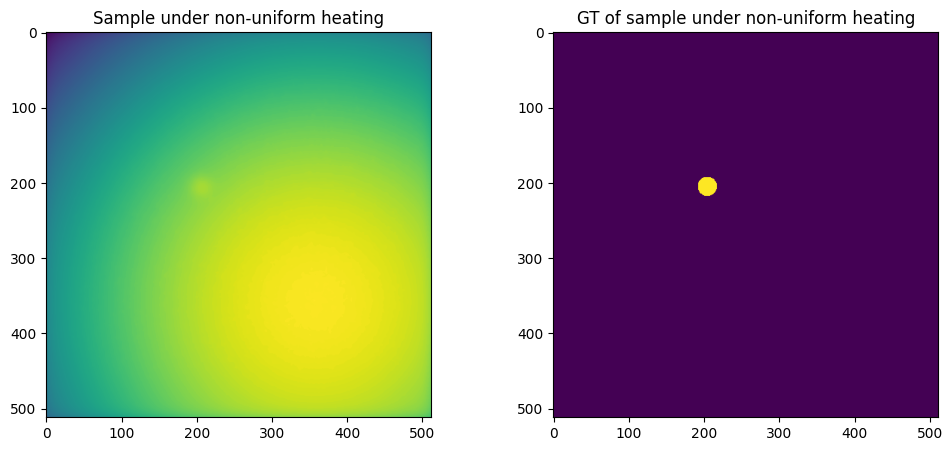

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample[0,50,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask[0,:,:])

In [ ]:
mask.max()

tensor(1, dtype=torch.uint8)

In [ ]:
mask.min()

tensor(0, dtype=torch.uint8)

In [ ]:
sample_n,mask_n=noise(sample,mask)

In [ ]:
mask_n.size()

torch.Size([1, 512, 512])

In [ ]:
mask_n.max()

tensor(1, dtype=torch.uint8)

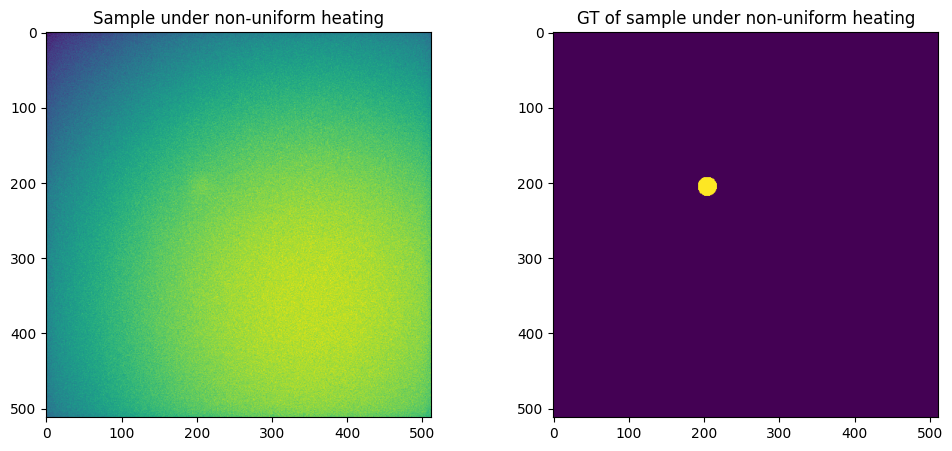

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample_n[0,50,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask_n[0,:,:])

In [ ]:
sample_f,mask_f=flip(sample,mask)

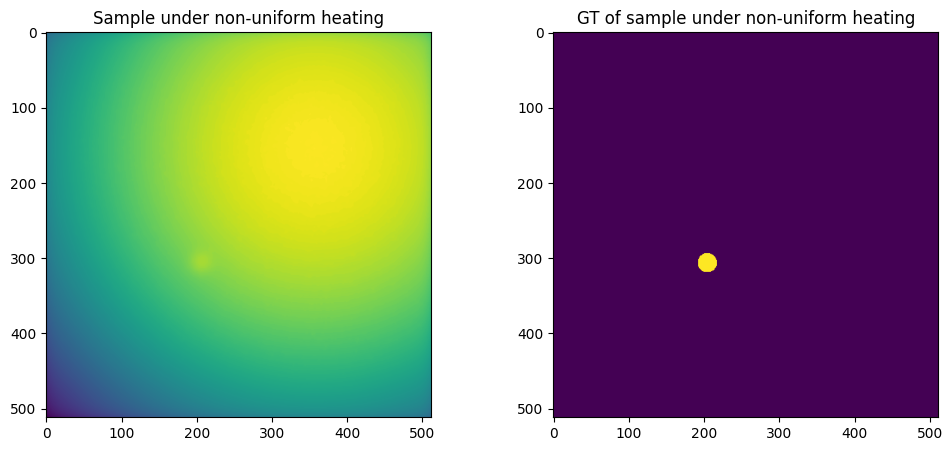

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample_f[0,50,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask_f[0,:,:])

In [ ]:
mask_f.max()

tensor(1, dtype=torch.uint8)

In [ ]:
sample_r,mask_r=rotation(sample,mask)

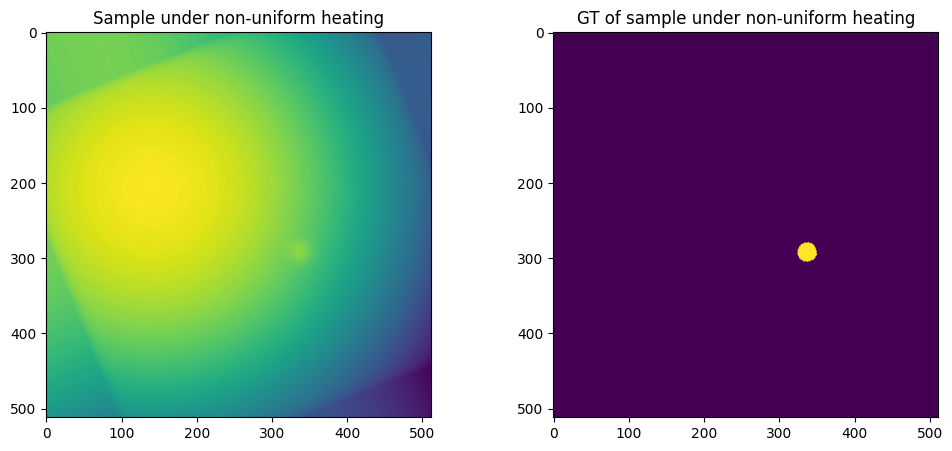

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample_r[0,50,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask_r[0,:,:])

In [ ]:
mask.size()

torch.Size([1, 512, 512])

In [ ]:
sample_e,mask_e=elastic(sample,mask)

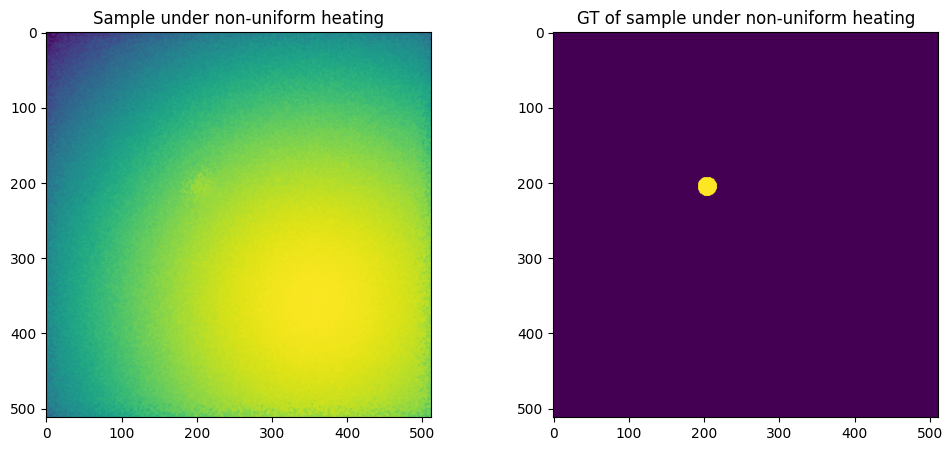

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample_e[0,50,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask_e[0,:,:])

In [ ]:
mask_e.max()

tensor(1, dtype=torch.uint8)

In [ ]:
sample_p,mask_p=prepend(sample,mask)

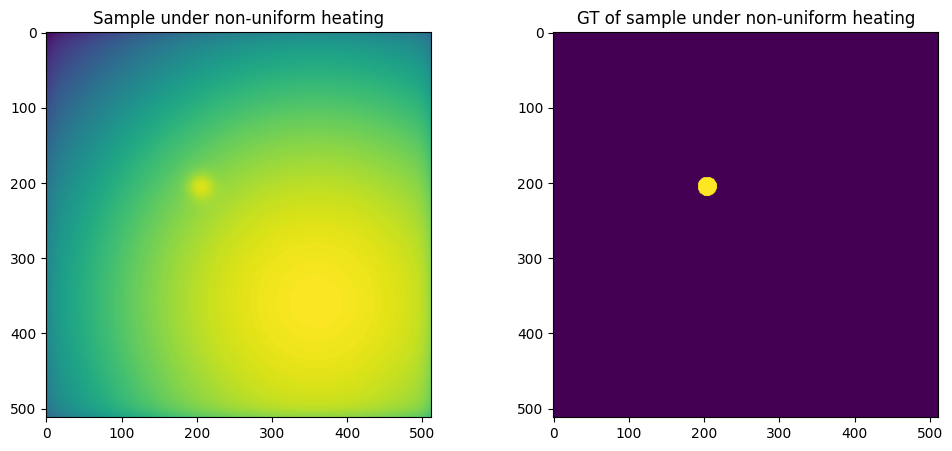

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample_p[0,120,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask_p[0,:,:])

In [ ]:
sample_c,mask_c=crop(sample,mask)

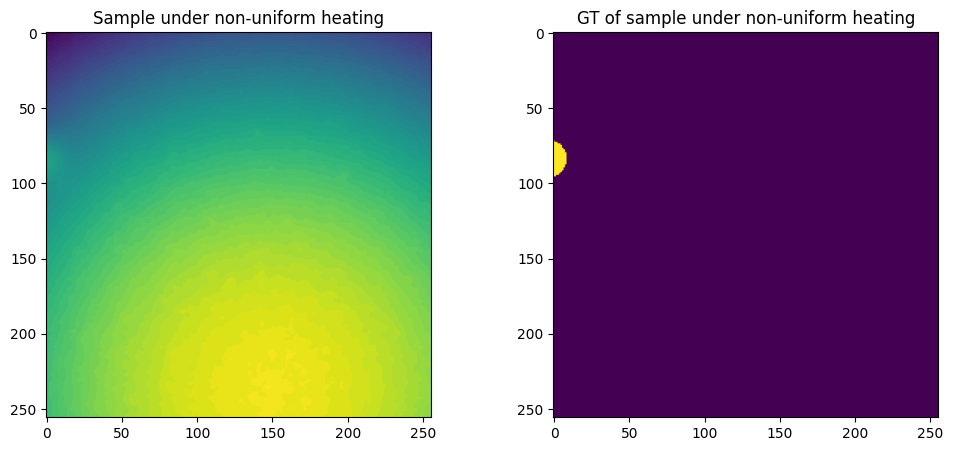

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample_c[0,50,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask_c[0,:,:])

In [ ]:
sample_b,mask_b=brightcontrast(sample,mask)

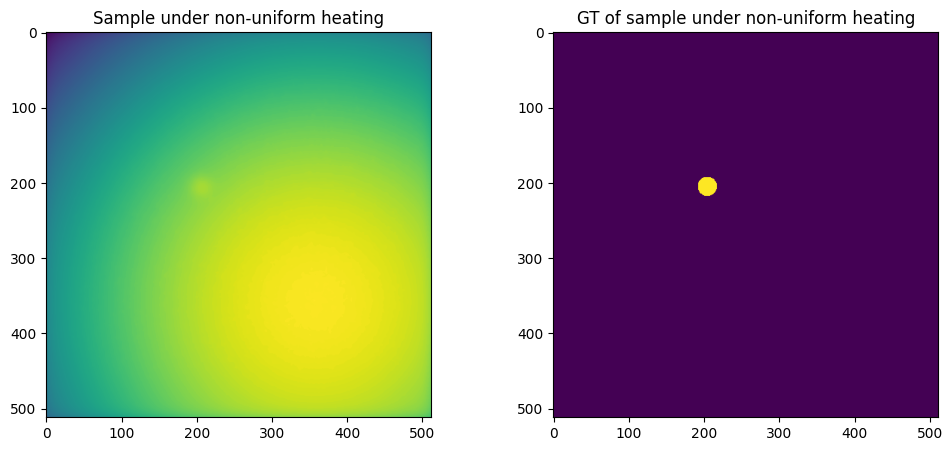

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample_b[0,50,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask_b[0,:,:])

In [ ]:
mask_b.max()

tensor(1, dtype=torch.uint8)

In [ ]:
sample_s,mask_s=temporal(sample,mask)

In [ ]:
mask_s.max()

tensor(1, dtype=torch.uint8)

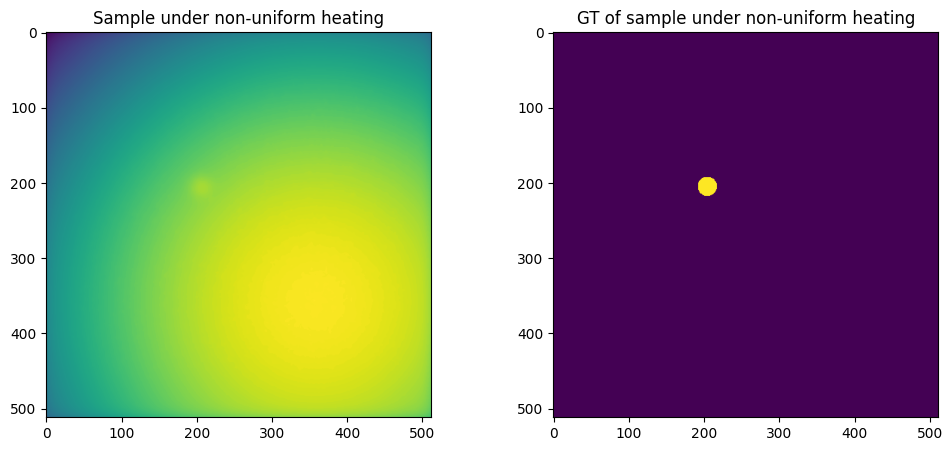

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Sample under non-uniform heating')
plt.imshow(sample_s[0,50,:,:])

plt.subplot(1,2,2)
plt.title('GT of sample under non-uniform heating')
plt.imshow(mask_s[0,:,:])

<h1>Examples of transformation<h1>

In [2]:
sample_gauss=np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Only_gaussian/param_fbh_gaussian_size20mm_depth20pct_thickness6mm.npz')
sample_uniform=np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Only_uniform/param_fbh_size20mm_depth20pct_thickness6mm.npz')

In [3]:
sample_gauss['mask'].dtype

dtype('uint8')

In [4]:
sample_gdata=sample_gauss['data']
sample_gdata=torch.from_numpy(sample_gdata).to(torch.float64)

mask_g=sample_gauss['mask']
mask_g=torch.from_numpy(mask_g).to(torch.uint8)

sample_udata=sample_uniform['data']
sample_udata=torch.from_numpy(sample_udata).to(torch.float64)

mask_u=sample_uniform['mask']
mask_u=torch.from_numpy(mask_u).to(torch.uint8)

In [5]:
sample_gdata=sample_gdata.unsqueeze(0)
mask_g=mask_g.unsqueeze(0)

sample_udata=sample_udata.unsqueeze(0)
mask_u=mask_u.unsqueeze(0)

In [ ]:
transforms=[
    # RandomPhaseAwareSpeedChange(),
    # RandomBrightnessContrast(),
    # PrependFirstFrame(),
    # RandomFlip3D(axes=(1,2)),
    # RandomElasticTransform(),
    # RandomSequenceRotation(),
    # RandomCropSequence(),
    # AddGaussianNoise3D()
]     

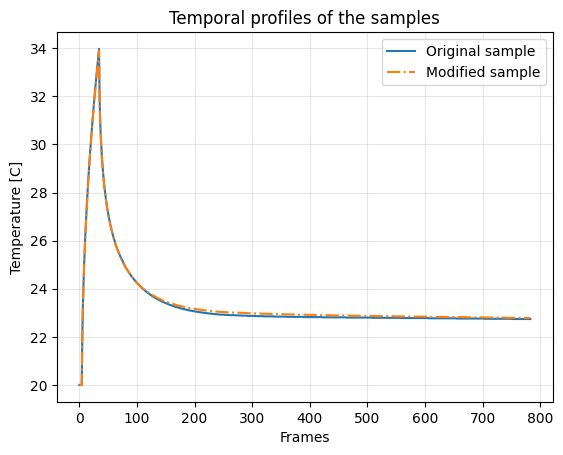

In [17]:
modification=Compose3D(transforms=transforms)
sample_gmod,mask_gmod=modification(sample_gdata,mask_g)
sample_umod,mask_umod=modification(sample_udata,mask_u)

plt.plot(sample_gdata[0,:,250,250],label='Original sample')
plt.plot(sample_gmod[0,:,250,250],label='Modified sample',linestyle='-.')
plt.grid(alpha=0.3)
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.title('Temporal profiles of the samples')
plt.legend()


Text(0.5, 1.0, 'Modified GT')

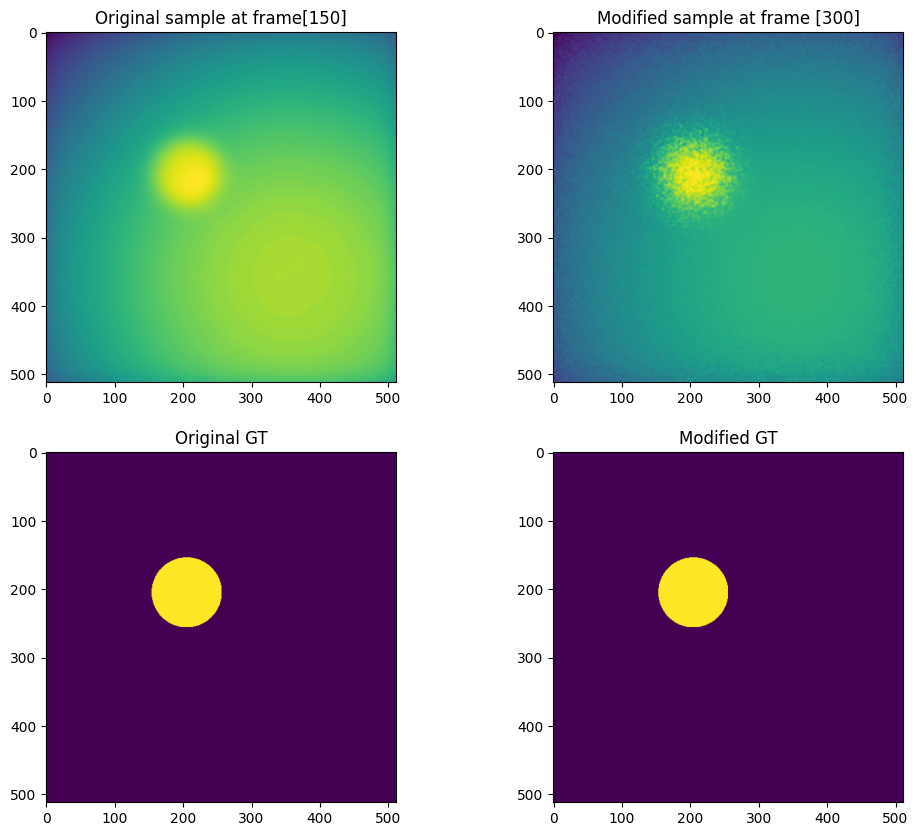

In [18]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(sample_gdata[0,150,:,:])
plt.title('Original sample at frame[150]')

plt.subplot(2,2,2)
plt.imshow(sample_gmod[0,300,:,:])
plt.title('Modified sample at frame [300]')

plt.subplot(2,2,3)
plt.imshow(mask_g[0,:,:])
plt.title('Original GT')

plt.subplot(2,2,4)
plt.imshow(mask_gmod[0,:,:])
plt.title('Modified GT')
